#### Antoine Gorceix and Gillian Keusch

# A Benchmark of metrics for text summarization

For the presentation we drew on the analysis proposed in the Hanna notebook that we applied to the Text Summarization.

In [159]:
### Imports ###
import csv
import json
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pingouin as pg 
from scipy.special import binom
import scipy.stats as st
from scipy.stats import pearsonr, spearmanr, kendalltau
import seaborn as sns
from sklearn.metrics import f1_score
from utils import *
#from williams import williams_test

## Data Visualisation :

In [160]:
INIT_METRICS_DF= pd.read_json("./summeval.model_annotations.aligned.paired.jsonl",lines=True)
INIT_METRICS_DF

,id,decoded,expert_annotations,turker_annotations,references,model_id,filepath,text
0,dm-test-8764fb95bfad8ee849274873a92fb8d6b400eee2,paul merson was brought on with only seven min...,"[{'coherence': 2, 'consistency': 1, 'fluency':...","[{'coherence': 3, 'consistency': 3, 'fluency':...",[Andros Townsend an 83rd minute sub in Tottenh...,M11,cnndm/dailymail/stories/8764fb95bfad8ee8492748...,Paul Merson has restarted his row with Andros ...
1,dm-test-8764fb95bfad8ee849274873a92fb8d6b400eee2,paul merson has restarted his row with andros ...,"[{'coherence': 3, 'consistency': 5, 'fluency':...","[{'coherence': 2, 'consistency': 3, 'fluency':...",[Andros Townsend an 83rd minute sub in Tottenh...,M13,cnndm/dailymail/stories/8764fb95bfad8ee8492748...,Paul Merson has restarted his row with Andros ...
2,dm-test-8764fb95bfad8ee849274873a92fb8d6b400eee2,paul merson has restarted his row with andros ...,"[{'coherence': 2, 'consistency': 5, 'fluency':...","[{'coherence': 4, 'consistency': 5, 'fluency':...",[Andros Townsend an 83rd minute sub in Tottenh...,M1,cnndm/dailymail/stories/8764fb95bfad8ee8492748...,Paul Merson has restarted his row with Andros ...
3,dm-test-8764fb95bfad8ee849274873a92fb8d6b400eee2,paul merson has restarted his row with andros ...,"[{'coherence': 2, 'consistency': 5, 'fluency':...","[{'coherence': 5, 'consistency': 5, 'fluency':...",[Andros Townsend an 83rd minute sub in Tottenh...,M14,cnndm/dailymail/stories/8764fb95bfad8ee8492748...,Paul Merson has restarted his row with Andros ...
4,dm-test-8764fb95bfad8ee849274873a92fb8d6b400eee2,paul merson has restarted his row with andros ...,"[{'coherence': 4, 'consistency': 5, 'fluency':...","[{'coherence': 2, 'consistency': 4, 'fluency':...",[Andros Townsend an 83rd minute sub in Tottenh...,M15,cnndm/dailymail/stories/8764fb95bfad8ee8492748...,Paul Merson has restarted his row with Andros ...
...,...,...,...,...,...,...,...,...
1595,dm-test-e880fda4c25289f8325574246f0f8ed4ff5eb26b,a timewarp home which has remained unchanged s...,"[{'coherence': 5, 'consistency': 5, 'fluency':...","[{'coherence': 4, 'consistency': 3, 'fluency':...",[Nondescript semi-detached home for sale in Ho...,M0,cnndm/dailymail/stories/e880fda4c25289f8325574...,A timewarp home which has remained unchanged s...
1596,dm-test-e880fda4c25289f8325574246f0f8ed4ff5eb26b,"The collector 's paradise in Horfield , Bristo...","[{'coherence': 3, 'consistency': 5, 'fluency':...","[{'coherence': 4, 'consistency': 4, 'fluency':...",[Nondescript semi-detached home for sale in Ho...,M22,cnndm/dailymail/stories/e880fda4c25289f8325574...,A timewarp home which has remained unchanged s...
1597,dm-test-e880fda4c25289f8325574246f0f8ed4ff5eb26b,"the collector’s paradise in horfield , bristol...","[{'coherence': 5, 'consistency': 5, 'fluency':...","[{'coherence': 4, 'consistency': 4, 'fluency':...",[Nondescript semi-detached home for sale in Ho...,M8,cnndm/dailymail/stories/e880fda4c25289f8325574...,A timewarp home which has remained unchanged s...
1598,dm-test-e880fda4c25289f8325574246f0f8ed4ff5eb26b,"the collector 's paradise in horfield , bristo...","[{'coherence': 3, 'consistency': 5, 'fluency':...","[{'coherence': 4, 'consistency': 3, 'fluency':...",[Nondescript semi-detached home for sale in Ho...,M10,cnndm/dailymail/stories/e880fda4c25289f8325574...,A timewarp home which has remained unchanged s...


In [3]:
Pros_METRICS_DF= pd.read_json("./processed.summarization.cnndm",lines=True)
Pros_METRICS_DF

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,{'hypothesis': 'paul merson was brought on wit...,{'hypothesis': 'paul merson has restarted his ...,{'hypothesis': 'paul merson has restarted his ...,{'hypothesis': 'paul merson has restarted his ...,{'hypothesis': 'paul merson has restarted his ...,{'hypothesis': 'paul merson has restarted his ...,{'hypothesis': 'paul merson has restarted his ...,{'hypothesis': 'paul merson criticised andros ...,{'hypothesis': 'Paul Merson is not happy with ...,{'hypothesis': 'paul merson had a dig at andro...,...,{'hypothesis': 'a timewarp home which has rema...,{'hypothesis': 'the collector’s paradise in ho...,{'hypothesis': 'The house is up for sale compl...,{'hypothesis': 'the collector’s paradise in ho...,{'hypothesis': 'a timewarp home which has rema...,{'hypothesis': 'a timewarp home which has rema...,{'hypothesis': 'The collector 's paradise in H...,{'hypothesis': 'the collector’s paradise in ho...,{'hypothesis': 'the collector 's paradise in h...,{'hypothesis': 'the timewarp home has remained...


## Meta-evaluation :

### Method 1

Let’s calculate the correlations from an already process file. The problem with this method is that it is not possible to know how effective the different models are, nor to carry out a more detailed analysis by distinguishing the Sum-Up level and the system-level.

### Correlation :

In [4]:
H_C=['coherence','consistency','relevance','fluency']
Metrics=['rouge1','rouge2', 'rougeL','rougeLsum','sacrebleu','meteor','bertscore','bleurt','length','repetition_1',
'repetition_2',
  'repetition_3',
  'abstractness_1',
  'abstractness_2',
  'abstractness_3',
  'bertscore_f1',
  'bertscore_precision',
  'bertscore_recall',
  'nubia_score',
  'nubia_irrelevancy',
  'perplexity']
ref='ref_11'

In [5]:
CORRELATIONS = {
    "pearson": pearsonr,
    "spearman": spearmanr,
    "kendall": kendalltau
}

In [7]:
D_metrics={}

In [8]:
for c in H_C:
    D_metrics[c]=[]
for c in Metrics :
    D_metrics[c]=[]

In [9]:
D_metrics

{'coherence': [],
 'consistency': [],
 'relevance': [],
 'fluency': [],
 'rouge1': [],
 'rouge2': [],
 'rougeL': [],
 'rougeLsum': [],
 'sacrebleu': [],
 'meteor': [],
 'bertscore': [],
 'bleurt': [],
 'length': [],
 'repetition_1': [],
 'repetition_2': [],
 'repetition_3': [],
 'abstractness_1': [],
 'abstractness_2': [],
 'abstractness_3': [],
 'bertscore_f1': [],
 'bertscore_precision': [],
 'bertscore_recall': [],
 'nubia_score': [],
 'nubia_irrelevancy': [],
 'perplexity': []}

In [10]:
for i in range(1600):
    for c in H_C :
        D_metrics[c].append(Pros_METRICS_DF[i][0][c])
    for c in Metrics :
        D_metrics[c].append(Pros_METRICS_DF[i][0][ref][c])

In [11]:
def get_correlation(Kstr, metric1, metric2, D_metrics):
    K = CORRELATIONS[Kstr]
    return K(D_metrics[metric1],D_metrics[metric2])[0]

In [12]:
get_correlation('pearson','consistency', 'rouge1', D_metrics)

0.16670391191360173

In [13]:
def get_correlation_df(Kstr,D_metrics, metrics_subset1, metrics_subset2):
    I = len(metrics_subset1)
    J = len(metrics_subset2)
    data = np.ones((I, J))
    for i in range(I):
        for j in range(J):
            metric1 = metrics_subset1[i]
            metric2 = metrics_subset2[j]
            data[i][j] = get_correlation(Kstr, metric1, metric2, D_metrics)
    return pd.DataFrame(data, index=metrics_subset1, columns=metrics_subset2)

In [14]:
get_correlation_df('pearson',D_metrics, metrics_subset1=H_C, metrics_subset2=Metrics)

,rouge1,rouge2,rougeL,rougeLsum,sacrebleu,meteor,bertscore,bleurt,length,repetition_1,...,repetition_3,abstractness_1,abstractness_2,abstractness_3,bertscore_f1,bertscore_precision,bertscore_recall,nubia_score,nubia_irrelevancy,perplexity
coherence,0.181262,0.131416,0.154887,0.154887,0.249679,0.167974,0.347109,0.141593,0.085678,0.085678,...,0.085678,-0.271729,-0.299690,-0.304947,0.347109,0.309904,0.338299,0.072205,0.131890,-0.156977
consistency,0.166704,0.146732,0.141822,0.141822,0.117483,0.172987,0.130549,0.094197,0.081269,0.081269,...,0.081269,-0.192774,-0.340409,-0.351823,0.130549,0.091104,0.147413,0.060354,0.138053,0.031063
relevance,0.322988,0.239756,0.248455,0.248455,0.289784,0.360010,0.339572,0.272982,0.265755,0.265755,...,0.265755,-0.244743,-0.298267,-0.310013,0.339572,0.246648,0.398854,0.144195,0.125222,-0.197501
fluency,0.135913,0.087046,0.109944,0.109944,0.139040,0.114460,0.166935,0.172400,-0.028820,-0.028820,...,-0.028820,-0.133344,-0.246912,-0.268405,0.166935,0.162886,0.138384,0.075032,0.094190,-0.088725


In [15]:
get_correlation_df('kendall',D_metrics, metrics_subset1=H_C, metrics_subset2=Metrics)

,rouge1,rouge2,rougeL,rougeLsum,sacrebleu,meteor,bertscore,bleurt,length,repetition_1,...,repetition_3,abstractness_1,abstractness_2,abstractness_3,bertscore_f1,bertscore_precision,bertscore_recall,nubia_score,nubia_irrelevancy,perplexity
coherence,0.123396,0.096732,0.112815,0.112815,0.166550,0.115909,0.245783,0.097721,0.063977,0.060712,...,0.061810,-0.190347,-0.222535,-0.219888,0.245782,0.208839,0.247448,0.051105,0.081553,-0.125174
consistency,0.104631,0.100808,0.090738,0.090738,0.080397,0.124536,0.085196,0.076472,0.074959,0.072358,...,0.074330,-0.126475,-0.227397,-0.247439,0.085199,0.050455,0.103789,0.042171,0.121139,0.022029
relevance,0.208708,0.166508,0.165190,0.165190,0.207788,0.222914,0.256249,0.175935,0.182253,0.179172,...,0.180405,-0.178652,-0.214501,-0.216757,0.256247,0.191690,0.290362,0.102234,0.080999,-0.133904
fluency,0.062082,0.047847,0.061313,0.061313,0.087608,0.070246,0.109266,0.125484,-0.005892,-0.007592,...,-0.006169,-0.101113,-0.162434,-0.177349,0.109268,0.095956,0.097125,0.039595,0.083277,-0.084650


In [16]:
get_correlation_df('spearman',D_metrics, metrics_subset1=H_C, metrics_subset2=Metrics)

,rouge1,rouge2,rougeL,rougeLsum,sacrebleu,meteor,bertscore,bleurt,length,repetition_1,...,repetition_3,abstractness_1,abstractness_2,abstractness_3,bertscore_f1,bertscore_precision,bertscore_recall,nubia_score,nubia_irrelevancy,perplexity
coherence,0.174894,0.138095,0.159608,0.159608,0.237579,0.164561,0.347602,0.141187,0.087482,0.083469,...,0.084722,-0.265907,-0.309137,-0.305154,0.347601,0.294945,0.350465,0.074008,0.117455,-0.176680
consistency,0.132883,0.128100,0.115425,0.115425,0.102089,0.158208,0.108383,0.097871,0.094614,0.091881,...,0.094065,-0.160868,-0.288165,-0.312952,0.108387,0.063878,0.131987,0.053552,0.153781,0.028467
relevance,0.288820,0.233501,0.230946,0.230946,0.290237,0.311767,0.356940,0.248564,0.252292,0.249811,...,0.250497,-0.247684,-0.295890,-0.299023,0.356938,0.267871,0.404734,0.142916,0.115251,-0.187760
fluency,0.080269,0.061508,0.078767,0.078767,0.113153,0.091085,0.141044,0.162643,-0.007074,-0.009310,...,-0.007440,-0.129835,-0.208413,-0.226984,0.141047,0.123908,0.125877,0.051452,0.106408,-0.107368


## Best metric :

In [17]:
def print_best_metrics(Kstr,D_metrics, n_best=5):
    corr = get_correlation_df(Kstr,D_metrics, metrics_subset2=H_C, metrics_subset1=Metrics)
    for criterion in H_C:
        print(criterion)
        print(corr.abs().sort_values(criterion, ascending=False)[criterion].head(n_best))

In [18]:
print_best_metrics("kendall",D_metrics)

coherence
bertscore_recall    0.247448
bertscore           0.245783
bertscore_f1        0.245782
abstractness_2      0.222535
abstractness_3      0.219888
Name: coherence, dtype: float64
consistency
abstractness_3       0.247439
abstractness_2       0.227397
abstractness_1       0.126475
meteor               0.124536
nubia_irrelevancy    0.121139
Name: consistency, dtype: float64
relevance
bertscore_recall    0.290362
bertscore           0.256249
bertscore_f1        0.256247
meteor              0.222914
abstractness_3      0.216757
Name: relevance, dtype: float64
fluency
abstractness_3    0.177349
abstractness_2    0.162434
bleurt            0.125484
bertscore_f1      0.109268
bertscore         0.109266
Name: fluency, dtype: float64


In [19]:
print_best_metrics("pearson",D_metrics)

coherence
bertscore              0.347109
bertscore_f1           0.347109
bertscore_recall       0.338299
bertscore_precision    0.309904
abstractness_3         0.304947
Name: coherence, dtype: float64
consistency
abstractness_3    0.351823
abstractness_2    0.340409
abstractness_1    0.192774
meteor            0.172987
rouge1            0.166704
Name: consistency, dtype: float64
relevance
bertscore_recall    0.398854
meteor              0.360010
bertscore           0.339572
bertscore_f1        0.339572
rouge1              0.322988
Name: relevance, dtype: float64
fluency
abstractness_3    0.268405
abstractness_2    0.246912
bleurt            0.172400
bertscore         0.166935
bertscore_f1      0.166935
Name: fluency, dtype: float64


In [20]:
print_best_metrics("spearman",D_metrics)

coherence
bertscore_recall    0.350465
bertscore           0.347602
bertscore_f1        0.347601
abstractness_2      0.309137
abstractness_3      0.305154
Name: coherence, dtype: float64
consistency
abstractness_3       0.312952
abstractness_2       0.288165
abstractness_1       0.160868
meteor               0.158208
nubia_irrelevancy    0.153781
Name: consistency, dtype: float64
relevance
bertscore_recall    0.404734
bertscore           0.356940
bertscore_f1        0.356938
meteor              0.311767
abstractness_3      0.299023
Name: relevance, dtype: float64
fluency
abstractness_3    0.226984
abstractness_2    0.208413
bleurt            0.162643
bertscore_f1      0.141047
bertscore         0.141044
Name: fluency, dtype: float64


### Méthode 2

The first non process file is used to calculate the different correlations. To do this, we first calculate the metrics for each Sum-Up generated by each model, then we calculate the correlation with the human metrics.

This allows a finer analysis, especially by having two levels: "SumUp level" and "text level".

### Correlation :

In [27]:
#bleurt = evaluate.load('bleurt')

In [22]:
!pip install POT
!pip install geomloss

In [94]:
import os
os.environ['TOKENIZERS_PARALLELISM'] = 'true'

In [142]:
from nlg_eval_via_simi_measures.infolm import InfoLM
from nlg_eval_via_simi_measures.bary_score import BaryScoreMetric
from nlg_eval_via_simi_measures.depth_score import DepthScoreMetric
from rouge_metric import PerlRouge
import evaluate

In [143]:
### Metrics ###
rouge = PerlRouge()
meteor = evaluate.load('meteor')
bert = evaluate.load('bertscore')
bleu = evaluate.load('sacrebleu')
perplex = evaluate.load('perplexity')
info = InfoLM()
depth = DepthScoreMetric()
barry = BaryScoreMetric()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/gorceixantoine/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gorceixantoine/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/gorceixantoine/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequ

In [ ]:
INIT_METRICS_DFT[0]
results = bert.compute(predictions=[INIT_METRICS_DFT[2]['decoded']],references=[INIT_METRICS_DFT[0]['references'][1]], lang="en")
results

In [40]:
results = perplex.compute(predictions=[INIT_METRICS_DFT[1]['decoded']],model_id='gpt2')#,references=[INIT_METRICS_DFT[0]['references'][0]])#, lang="en")
results

Using pad_token, but it is not set yet.


  0%|          | 0/1 [00:00<?, ?it/s]

{'perplexities': [91.06441497802734], 'mean_perplexity': 91.06441497802734}

In [42]:
INIT_METRICS_DFT[0]
results = bleu.compute(predictions=[INIT_METRICS_DFT[2]['decoded']],references=[INIT_METRICS_DFT[0]['references'][1]]) #lang="en")
results

{'score': 1.9663243450214396,
 'counts': [11, 2, 0, 0],
 'totals': [67, 66, 65, 64],
 'precisions': [16.417910447761194,
  3.0303030303030303,
  0.7692307692307693,
  0.390625],
 'bp': 1.0,
 'sys_len': 67,
 'ref_len': 46}

In [164]:
CORRELATION_TYPES = ["sumup", "system"]
ref='ref_11'
M=['coherence','consistency','fluency','relevance','meteor','rouge-1','rouge-2','bleu','bert','barry','depth'] #,'perplex']
M1=['coherence','consistency','fluency','relevance']
M2= ['meteor','rouge-1','rouge-2','bleu','bert','barry','depth']     #,'perplex']

In [165]:
# There are 24 different models
D_inter={}
for k in range(0,24):
    D_inter["M"+str(k)]={}
    for m in M :
        D_inter["M"+str(k)][m]=[]
D_inter

{'M0': {'coherence': [],
  'consistency': [],
  'fluency': [],
  'relevance': [],
  'meteor': [],
  'rouge-1': [],
  'rouge-2': [],
  'bleu': [],
  'bert': [],
  'barry': [],
  'depth': []},
 'M1': {'coherence': [],
  'consistency': [],
  'fluency': [],
  'relevance': [],
  'meteor': [],
  'rouge-1': [],
  'rouge-2': [],
  'bleu': [],
  'bert': [],
  'barry': [],
  'depth': []},
 'M2': {'coherence': [],
  'consistency': [],
  'fluency': [],
  'relevance': [],
  'meteor': [],
  'rouge-1': [],
  'rouge-2': [],
  'bleu': [],
  'bert': [],
  'barry': [],
  'depth': []},
 'M3': {'coherence': [],
  'consistency': [],
  'fluency': [],
  'relevance': [],
  'meteor': [],
  'rouge-1': [],
  'rouge-2': [],
  'bleu': [],
  'bert': [],
  'barry': [],
  'depth': []},
 'M4': {'coherence': [],
  'consistency': [],
  'fluency': [],
  'relevance': [],
  'meteor': [],
  'rouge-1': [],
  'rouge-2': [],
  'bleu': [],
  'bert': [],
  'barry': [],
  'depth': []},
 'M5': {'coherence': [],
  'consistency': [],

In [ ]:
### If not enough time to calculate the scores of each abstract, load the pre-calculated file directly ###
with open("d_inter.txt", "r") as fichier:
    Dico = fichier.read()
D_inter = eval(Dico)
D_inter

In [166]:
for k in range(1600):
    print(k)
    m=INIT_METRICS_DFT[k]['model_id']
    D_inter[m]['coherence'].append(1/3*sum([INIT_METRICS_DFT[k]['expert_annotations'][i]['coherence'] for i in range(3)]))
    D_inter[m]['consistency'].append(1/3*sum([INIT_METRICS_DFT[k]['expert_annotations'][i]['consistency'] for i in range(3)]))
    D_inter[m]['fluency'].append(1/3*sum([INIT_METRICS_DFT[k]['expert_annotations'][i]['fluency'] for i in range(3)]))
    D_inter[m]['relevance'].append(1/3*sum([INIT_METRICS_DFT[k]['expert_annotations'][i]['relevance'] for i in range(3)]))
    D_inter[m]['meteor'].append(meteor.compute(predictions=[INIT_METRICS_DFT[k]['decoded']],references=[INIT_METRICS_DFT[k]['references'][0]])['meteor'])
    results=rouge.evaluate([INIT_METRICS_DFT[k]['decoded']],[[INIT_METRICS_DFT[k]['references'][0]]])
    D_inter[m]['rouge-1'].append(results['rouge-1']['r'])
    D_inter[m]['rouge-2'].append(results['rouge-2']['r'])
    D_inter[m]['bleu'].append(bleu.compute(predictions=[INIT_METRICS_DFT[k]['decoded']],references=[INIT_METRICS_DFT[k]['references'][0]])['score'])
    D_inter[m]['bert'].append(bert.compute(predictions=[INIT_METRICS_DFT[k]['decoded']],references=[INIT_METRICS_DFT[k]['references'][0]], lang="en")['precision'][0])
    barry.prepare_idfs([INIT_METRICS_DFT[k]['decoded']],[INIT_METRICS_DFT[k]['references'][0]])
    D_inter[m]['barry'].append(barry.evaluate_batch([INIT_METRICS_DFT[k]['decoded']],[INIT_METRICS_DFT[k]['references'][0]])['baryscore_W'][0])
    D_inter[m]['depth'].append(depth.evaluate_batch([INIT_METRICS_DFT[k]['decoded']],[INIT_METRICS_DFT[k]['references'][0]])['depth_score'][0])
    #D_inter[m]['perplex'].append(perplex.compute(predictions=[INIT_METRICS_DFT[1]['decoded']],model_id='gpt2')['perplexities'])
    #D_inter[m]['info'].append(info.evaluate_batch([INIT_METRICS_DFT[k]['decoded']],[INIT_METRICS_DFT[k]['references'][0]])['precision'][0])
#try:
    #geeky_file = open('d_inter.txt', 'wt')
    #geeky_file.write(str(D_inter))
    #geeky_file.close()
    
#except:
    #print("Unable to write to file")

0


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.14s/it]


1


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.16s/it]


2


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.61s/it]


3


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:03<00:00,  3.00s/it]


4


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


5


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.75s/it]


6


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.90s/it]


7


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.96s/it]


8


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.67s/it]


9


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.85s/it]


10


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.87s/it]


11


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


12


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


13


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.78s/it]


14


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


15


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


16


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.75s/it]


17


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.25s/it]


18


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.68s/it]


19


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.08s/it]


20


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.93s/it]


21


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.19s/it]


22


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.54s/it]


23


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:03<00:00,  3.30s/it]


24


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:03<00:00,  3.53s/it]


25


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.30s/it]


26


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.04s/it]


27


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.14s/it]


28


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.39s/it]


29


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.12s/it]


30


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.56s/it]


31


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.55s/it]


32


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.16s/it]


33


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.29s/it]


34


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.14s/it]


35


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.03s/it]


36


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.13s/it]


37


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.14s/it]


38


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.27s/it]


39


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.13s/it]


40


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.04s/it]


41


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.12s/it]


42


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.12s/it]


43


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.12s/it]


44


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.01s/it]


45


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:03<00:00,  3.99s/it]


46


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.17s/it]


47


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.21s/it]


48


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.52s/it]


49


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.19s/it]


50


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.15s/it]


51


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.11s/it]


52


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:03<00:00,  4.00s/it]


53


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.04s/it]


54


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.42s/it]


55


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.43s/it]


56


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.49s/it]


57


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:05<00:00,  5.43s/it]


58


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.95s/it]


59


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.54s/it]


60


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.46s/it]


61


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.61s/it]


62


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.50s/it]


63


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.42s/it]


64


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.38s/it]


65


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.44s/it]


66


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.56s/it]


67


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.45s/it]


68


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.35s/it]


69


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.58s/it]


70


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.45s/it]


71


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.26s/it]


72


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.45s/it]


73


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.30s/it]


74


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.39s/it]


75


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.40s/it]


76


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.39s/it]


77


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.30s/it]


78


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.49s/it]


79


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.45s/it]


80


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.45s/it]


81


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.51s/it]


82


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.81s/it]


83


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.42s/it]


84


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.45s/it]


85


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.45s/it]


86


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.52s/it]


87


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.63s/it]


88


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.40s/it]


89


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.48s/it]


90


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.49s/it]


91


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.42s/it]


92


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.42s/it]


93


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.50s/it]


94


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.63s/it]


95


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.48s/it]


96


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.54s/it]


97


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.51s/it]


98


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.67s/it]


99


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.44s/it]


100


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.49s/it]


101


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.55s/it]


102


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.56s/it]


103


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.66s/it]


104


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.47s/it]


105


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.52s/it]


106


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.42s/it]


107


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.54s/it]


108


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.55s/it]


109


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.59s/it]


110


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.57s/it]


111


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.52s/it]


112


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.69s/it]


113


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.96s/it]


114


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.85s/it]


115


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.38s/it]


116


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.66s/it]


117


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.52s/it]


118


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.67s/it]


119


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.62s/it]


120


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.55s/it]


121


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.55s/it]


122


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.60s/it]


123


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.63s/it]


124


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.22s/it]


125


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.15s/it]


126


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.11s/it]


127


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.15s/it]


128


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.26s/it]


129


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.21s/it]


130


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.17s/it]


131


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.25s/it]


132


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.41s/it]


133


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.14s/it]


134


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.38s/it]


135


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.25s/it]


136


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.11s/it]


137


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.19s/it]


138


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.17s/it]


139


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.24s/it]


140


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.15s/it]


141


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.22s/it]


142


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.13s/it]


143


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.34s/it]


144


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.04s/it]


145


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:03<00:00,  3.98s/it]


146


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.04s/it]


147


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.02s/it]


148


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.10s/it]


149


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.06s/it]


150


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.43s/it]


151


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.31s/it]


152


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.27s/it]


153


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.29s/it]


154


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.38s/it]


155


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.49s/it]


156


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.41s/it]


157


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.34s/it]


158


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.32s/it]


159


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.47s/it]


160


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.48s/it]


161


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.40s/it]


162


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.47s/it]


163


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.37s/it]


164


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.36s/it]


165


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.61s/it]


166


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.50s/it]


167


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.58s/it]


168


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.35s/it]


169


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.44s/it]


170


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.43s/it]


171


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.51s/it]


172


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.40s/it]


173


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.34s/it]


174


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.43s/it]


175


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.34s/it]


176


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.38s/it]


177


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:05<00:00,  5.66s/it]


178


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.61s/it]


179


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.41s/it]


180


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.58s/it]


181


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.47s/it]


182


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.53s/it]


183


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.35s/it]


184


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.38s/it]


185


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.32s/it]


186


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.45s/it]


187


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.42s/it]


188


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.40s/it]


189


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.32s/it]


190


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.49s/it]


191


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.46s/it]


192


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.30s/it]


193


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.38s/it]


194


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.78s/it]


195


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.33s/it]


196


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.33s/it]


197


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.46s/it]


198


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.33s/it]


199


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.31s/it]


200


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.44s/it]


201


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.29s/it]


202


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.46s/it]


203


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.51s/it]


204


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.35s/it]


205


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.33s/it]


206


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.33s/it]


207


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.29s/it]


208


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.44s/it]


209


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.52s/it]


210


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.18s/it]


211


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.06s/it]


212


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.45s/it]


213


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.26s/it]


214


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.32s/it]


215


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.08s/it]


216


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.23s/it]


217


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.17s/it]


218


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.16s/it]


219


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.35s/it]


220


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.06s/it]


221


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.14s/it]


222


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.20s/it]


223


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.32s/it]


224


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.25s/it]


225


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.13s/it]


226


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.17s/it]


227


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.18s/it]


228


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.39s/it]


229


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.24s/it]


230


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.60s/it]


231


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.52s/it]


232


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.52s/it]


233


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:05<00:00,  5.21s/it]


234


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.49s/it]


235


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.47s/it]


236


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.40s/it]


237


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.55s/it]


238


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.39s/it]


239


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.53s/it]


240


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.35s/it]


241


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.68s/it]


242


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.70s/it]


243


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.45s/it]


244


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.54s/it]


245


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.57s/it]


246


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.56s/it]


247


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.47s/it]


248


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.91s/it]


249


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.55s/it]


250


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.54s/it]


251


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.65s/it]


252


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.41s/it]


253


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.40s/it]


254


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.45s/it]


255


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.49s/it]


256


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.45s/it]


257


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.37s/it]


258


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.49s/it]


259


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.39s/it]


260


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.37s/it]


261


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.32s/it]


262


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.44s/it]


263


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.34s/it]


264


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.26s/it]


265


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.61s/it]


266


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.34s/it]


267


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.40s/it]


268


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.31s/it]


269


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.38s/it]


270


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.32s/it]


271


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.31s/it]


272


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.19s/it]


273


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:09<00:00,  9.88s/it]


274


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.46s/it]


275


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:03<00:00,  3.91s/it]


276


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.12s/it]


277


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.08s/it]


278


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.44s/it]


279


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.29s/it]


280


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.64s/it]


281


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.30s/it]


282


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.46s/it]


283


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.48s/it]


284


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.38s/it]


285


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.36s/it]


286


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.33s/it]


287


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.40s/it]


288


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.65s/it]


289


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.52s/it]


290


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.58s/it]


291


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.45s/it]


292


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.50s/it]


293


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.63s/it]


294


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.66s/it]


295


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.68s/it]


296


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.68s/it]


297


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.73s/it]


298


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.58s/it]


299


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.56s/it]


300


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.59s/it]


301


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.86s/it]


302


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.54s/it]


303


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.68s/it]


304


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.42s/it]


305


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.37s/it]


306


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.81s/it]


307


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.37s/it]


308


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.51s/it]


309


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.39s/it]


310


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.49s/it]


311


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.42s/it]


312


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.32s/it]


313


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.33s/it]


314


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.47s/it]


315


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.51s/it]


316


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.37s/it]


317


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.35s/it]


318


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.36s/it]


319


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.35s/it]


320


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.55s/it]


321


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.49s/it]


322


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.57s/it]


323


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.43s/it]


324


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.09s/it]


325


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.09s/it]


326


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.10s/it]


327


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.05s/it]


328


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:03<00:00,  3.93s/it]


329


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.50s/it]


330


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.21s/it]


331


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.45s/it]


332


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.08s/it]


333


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.00s/it]


334


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.05s/it]


335


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.02s/it]


336


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.17s/it]


337


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.11s/it]


338


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.14s/it]


339


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:03<00:00,  4.00s/it]


340


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.01s/it]


341


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.04s/it]


342


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.42s/it]


343


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.56s/it]


344


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.30s/it]


345


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.43s/it]


346


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.54s/it]


347


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.52s/it]


348


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.35s/it]


349


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.53s/it]


350


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.40s/it]


351


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.42s/it]


352


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.82s/it]


353


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.69s/it]


354


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.74s/it]


355


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.62s/it]


356


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.84s/it]


357


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.67s/it]


358


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.86s/it]


359


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.66s/it]


360


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.66s/it]


361


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.79s/it]


362


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.61s/it]


363


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.41s/it]


364


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.23s/it]


365


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.48s/it]


366


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.26s/it]


367


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.32s/it]


368


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.05s/it]


369


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.02s/it]


370


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.03s/it]


371


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:03<00:00,  4.00s/it]


372


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.02s/it]


373


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:03<00:00,  3.96s/it]


374


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.06s/it]


375


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.27s/it]


376


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:03<00:00,  3.97s/it]


377


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.04s/it]


378


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:03<00:00,  4.00s/it]


379


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:03<00:00,  3.98s/it]


380


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.01s/it]


381


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.09s/it]


382


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.24s/it]


383


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.57s/it]


384


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.65s/it]


385


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.44s/it]


386


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.70s/it]


387


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.47s/it]


388


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.71s/it]


389


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.44s/it]


390


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.58s/it]


391


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.46s/it]


392


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:05<00:00,  5.35s/it]


393


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.41s/it]


394


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.42s/it]


395


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.69s/it]


396


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.59s/it]


397


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.43s/it]


398


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.36s/it]


399


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.58s/it]


400


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.41s/it]


401


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.31s/it]


402


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.80s/it]


403


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.25s/it]


404


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.31s/it]


405


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.36s/it]


406


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.57s/it]


407


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.40s/it]


408


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.37s/it]


409


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:05<00:00,  5.18s/it]


410


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.45s/it]


411


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.47s/it]


412


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.34s/it]


413


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.36s/it]


414


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.28s/it]


415


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.36s/it]


416


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.40s/it]


417


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.48s/it]


418


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.66s/it]


419


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.39s/it]


420


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.35s/it]


421


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.06s/it]


422


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.16s/it]


423


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.05s/it]


424


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:03<00:00,  3.98s/it]


425


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.02s/it]


426


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.11s/it]


427


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.11s/it]


428


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:03<00:00,  3.99s/it]


429


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.25s/it]


430


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:03<00:00,  3.96s/it]


431


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.06s/it]


432


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.07s/it]


433


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.00s/it]


434


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.07s/it]


435


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.04s/it]


436


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.02s/it]


437


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.01s/it]


438


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.05s/it]


439


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.39s/it]


440


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.02s/it]


441


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.04s/it]


442


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.14s/it]


443


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.18s/it]


444


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.49s/it]


445


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.36s/it]


446


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.48s/it]


447


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.38s/it]


448


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.61s/it]


449


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.45s/it]


450


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.53s/it]


451


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.47s/it]


452


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.44s/it]


453


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.58s/it]


454


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.68s/it]


455


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.41s/it]


456


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.49s/it]


457


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.42s/it]


458


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.68s/it]


459


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.55s/it]


460


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.09s/it]


461


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.36s/it]


462


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.14s/it]


463


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.18s/it]


464


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.27s/it]


465


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:06<00:00,  6.15s/it]


466


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.89s/it]


467


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.82s/it]


468


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


469


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████| 1/1 [1:03:52<00:00, 3832.03s/it]


470


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.99s/it]


471


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:03<00:00,  3.76s/it]


472


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.77s/it]


473


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.40s/it]


474


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.89s/it]


475


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.94s/it]


476


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.11s/it]


477


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.87s/it]


478


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.82s/it]


479


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.14s/it]


480


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.30s/it]


481


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.92s/it]


482


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.68s/it]


483


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


484


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


485


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


486


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.55s/it]


487


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


488


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


489


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


490


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


491


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.65s/it]


492


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


493


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


494


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


495


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


496


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


497


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.63s/it]


498


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.71s/it]


499


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


500


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


501


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.58s/it]


502


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.57s/it]


503


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.58s/it]


504


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


505


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.57s/it]


506


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


507


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


508


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


509


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


510


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


511


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


512


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


513


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


514


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


515


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


516


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


517


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.74s/it]


518


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.69s/it]


519


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.55s/it]


520


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


521


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


522


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


523


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


524


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


525


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


526


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


527


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


528


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


529


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


530


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.57s/it]


531


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


532


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


533


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.12s/it]


534


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.75s/it]


535


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.84s/it]


536


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


537


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


538


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.72s/it]


539


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


540


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.87s/it]


541


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:03<00:00,  3.54s/it]


542


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.55s/it]


543


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


544


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


545


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


546


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.62s/it]


547


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


548


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


549


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


550


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


551


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


552


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


553


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.63s/it]


554


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


555


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


556


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


557


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


558


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


559


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


560


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


561


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.60s/it]


562


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


563


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


564


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


565


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.59s/it]


566


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


567


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


568


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


569


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


570


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


571


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


572


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


573


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


574


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


575


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


576


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


577


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


578


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


579


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


580


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


581


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


582


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


583


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.43s/it]


584


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


585


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


586


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


587


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


588


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


589


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


590


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.44s/it]


591


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


592


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


593


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


594


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


595


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


596


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


597


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


598


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


599


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


600


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


601


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


602


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


603


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


604


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


605


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


606


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


607


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.55s/it]


608


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


609


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


610


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


611


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


612


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


613


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.44s/it]


614


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.58s/it]


615


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


616


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


617


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.44s/it]


618


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.44s/it]


619


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


620


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


621


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


622


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


623


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.55s/it]


624


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


625


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


626


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.57s/it]


627


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


628


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


629


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.55s/it]


630


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.57s/it]


631


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


632


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.55s/it]


633


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


634


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


635


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


636


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.64s/it]


637


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.70s/it]


638


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


639


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


640


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


641


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.62s/it]


642


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


643


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.44s/it]


644


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.44s/it]


645


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


646


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


647


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


648


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.41s/it]


649


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


650


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


651


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.65s/it]


652


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


653


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


654


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


655


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


656


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.60s/it]


657


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.58s/it]


658


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.57s/it]


659


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


660


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.57s/it]


661


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


662


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.55s/it]


663


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.55s/it]


664


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


665


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


666


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.57s/it]


667


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.58s/it]


668


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.55s/it]


669


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.57s/it]


670


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


671


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


672


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


673


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


674


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


675


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


676


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


677


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


678


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.68s/it]


679


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.60s/it]


680


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.78s/it]


681


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.28s/it]


682


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.77s/it]


683


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.59s/it]


684


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.71s/it]


685


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.55s/it]


686


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.62s/it]


687


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.76s/it]


688


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.67s/it]


689


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.66s/it]


690


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.65s/it]


691


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.59s/it]


692


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


693


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.57s/it]


694


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.58s/it]


695


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.87s/it]


696


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


697


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


698


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


699


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.70s/it]


700


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.11s/it]


701


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


702


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


703


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


704


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


705


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.78s/it]


706


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.68s/it]


707


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.25s/it]


708


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.62s/it]


709


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.72s/it]


710


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:03<00:00,  3.15s/it]


711


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.76s/it]


712


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.62s/it]


713


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.63s/it]


714


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.84s/it]


715


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


716


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.06s/it]


717


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.68s/it]


718


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.57s/it]


719


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:03<00:00,  3.31s/it]


720


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.73s/it]


721


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.62s/it]


722


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  2.00s/it]


723


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.31s/it]


724


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.66s/it]


725


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


726


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


727


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.73s/it]


728


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.41s/it]


729


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.31s/it]


730


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.87s/it]


731


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.73s/it]


732


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.61s/it]


733


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.55s/it]


734


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.62s/it]


735


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.83s/it]


736


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.82s/it]


737


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.80s/it]


738


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


739


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:03<00:00,  3.56s/it]


740


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.95s/it]


741


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


742


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.62s/it]


743


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


744


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.24s/it]


745


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.71s/it]


746


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


747


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.64s/it]


748


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.57s/it]


749


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


750


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


751


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.58s/it]


752


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.65s/it]


753


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.73s/it]


754


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.62s/it]


755


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.86s/it]


756


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.63s/it]


757


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.64s/it]


758


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.57s/it]


759


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.87s/it]


760


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.63s/it]


761


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.30s/it]


762


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.85s/it]


763


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.91s/it]


764


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.78s/it]


765


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.63s/it]


766


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.97s/it]


767


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.89s/it]


768


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.69s/it]


769


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.61s/it]


770


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.67s/it]


771


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.07s/it]


772


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.74s/it]


773


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.67s/it]


774


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.73s/it]


775


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.67s/it]


776


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.78s/it]


777


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.10s/it]


778


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.31s/it]


779


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.59s/it]


780


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.65s/it]


781


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.82s/it]


782


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.58s/it]


783


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.33s/it]


784


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.70s/it]


785


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.73s/it]


786


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.84s/it]


787


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.94s/it]


788


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


789


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.62s/it]


790


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.64s/it]


791


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.70s/it]


792


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.44s/it]


793


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:03<00:00,  3.11s/it]


794


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.32s/it]


795


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.94s/it]


796


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.58s/it]


797


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.61s/it]


798


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:03<00:00,  3.78s/it]


799


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.96s/it]


800


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.84s/it]


801


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:06<00:00,  6.08s/it]


802


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.41s/it]


803


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.55s/it]


804


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.75s/it]


805


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.65s/it]


806


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.99s/it]


807


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.68s/it]


808


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.55s/it]


809


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


810


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.72s/it]


811


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.02s/it]


812


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.57s/it]


813


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.93s/it]


814


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


815


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


816


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


817


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.61s/it]


818


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.63s/it]


819


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.67s/it]


820


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.74s/it]


821


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.60s/it]


822


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.77s/it]


823


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.49s/it]


824


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.78s/it]


825


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:02<00:00,  2.26s/it]


826


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.62s/it]


827


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.69s/it]


828


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.65s/it]


829


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.62s/it]


830


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


831


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.55s/it]


832


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.65s/it]


833


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


834


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


835


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


836


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


837


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


838


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.73s/it]


839


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:03<00:00,  3.17s/it]


840


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.64s/it]


841


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.44s/it]


842


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.66s/it]


843


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


844


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


845


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


846


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


847


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


848


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.73s/it]


849


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.61s/it]


850


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


851


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.61s/it]


852


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.72s/it]


853


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


854


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.55s/it]


855


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


856


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


857


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


858


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.55s/it]


859


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


860


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.93s/it]


861


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.59s/it]


862


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


863


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


864


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


865


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


866


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


867


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.55s/it]


868


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


869


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


870


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


871


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


872


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.72s/it]


873


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


874


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


875


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


876


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


877


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.44s/it]


878


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.44s/it]


879


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


880


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


881


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


882


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


883


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


884


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


885


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


886


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


887


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


888


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.83s/it]


889


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


890


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


891


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.77s/it]


892


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.67s/it]


893


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


894


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


895


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


896


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.57s/it]


897


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


898


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


899


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.44s/it]


900


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


901


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


902


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


903


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


904


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.63s/it]


905


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


906


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.59s/it]


907


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


908


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


909


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


910


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


911


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


912


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


913


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


914


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


915


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


916


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


917


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


918


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


919


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


920


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


921


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


922


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


923


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


924


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


925


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


926


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


927


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


928


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.59s/it]


929


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


930


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


931


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


932


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


933


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


934


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


935


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


936


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


937


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


938


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


939


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


940


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


941


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.57s/it]


942


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


943


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


944


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


945


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


946


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.57s/it]


947


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


948


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


949


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


950


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


951


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


952


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


953


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


954


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.57s/it]


955


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


956


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


957


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


958


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


959


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


960


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


961


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


962


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.55s/it]


963


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


964


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


965


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


966


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


967


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


968


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


969


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


970


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


971


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


972


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


973


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


974


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


975


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


976


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


977


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


978


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


979


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


980


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


981


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


982


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


983


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.44s/it]


984


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


985


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.62s/it]


986


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


987


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


988


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


989


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


990


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.44s/it]


991


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


992


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


993


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


994


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


995


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


996


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


997


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


998


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.58s/it]


999


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


1000


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.44s/it]


1001


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1002


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1003


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1004


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1005


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1006


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1007


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1008


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1009


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1010


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


1011


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1012


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


1013


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1014


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.57s/it]


1015


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1016


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1017


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.58s/it]


1018


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.55s/it]


1019


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


1020


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1021


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.71s/it]


1022


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1023


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1024


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1025


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.99s/it]


1026


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1027


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.62s/it]


1028


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1029


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1030


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1031


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1032


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1033


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1034


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.58s/it]


1035


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1036


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1037


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1038


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1039


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1040


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1041


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1042


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


1043


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1044


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1045


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1046


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1047


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1048


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.55s/it]


1049


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


1050


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1051


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1052


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1053


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1054


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1055


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1056


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1057


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


1058


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1059


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


1060


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


1061


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1062


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1063


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


1064


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


1065


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1066


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1067


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1068


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1069


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1070


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.44s/it]


1071


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


1072


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1073


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1074


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


1075


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


1076


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1077


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


1078


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1079


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1080


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1081


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1082


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


1083


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


1084


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


1085


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


1086


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.44s/it]


1087


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1088


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1089


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1090


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.59s/it]


1091


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1092


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1093


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


1094


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.55s/it]


1095


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.43s/it]


1096


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1097


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


1098


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1099


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


1100


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1101


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


1102


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1103


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1104


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


1105


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1106


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.58s/it]


1107


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1108


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


1109


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1110


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


1111


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1112


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1113


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1114


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


1115


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.55s/it]


1116


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1117


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


1118


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1119


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1120


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1121


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1122


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1123


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1124


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1125


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.57s/it]


1126


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1127


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


1128


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


1129


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1130


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1131


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1132


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


1133


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1134


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1135


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1136


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


1137


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


1138


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1139


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1140


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1141


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1142


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1143


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1144


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


1145


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


1146


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.44s/it]


1147


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.76s/it]


1148


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


1149


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1150


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1151


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1152


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1153


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


1154


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1155


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1156


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


1157


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1158


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1159


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1160


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1161


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1162


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1163


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


1164


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


1165


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


1166


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1167


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1168


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.59s/it]


1169


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1170


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


1171


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1172


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1173


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


1174


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


1175


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1176


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1177


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.55s/it]


1178


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1179


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.58s/it]


1180


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1181


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1182


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1183


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


1184


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1185


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1186


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1187


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1188


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1189


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1190


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1191


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1192


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1193


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1194


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


1195


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


1196


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1197


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1198


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


1199


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1200


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1201


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1202


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


1203


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1204


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


1205


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1206


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1207


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1208


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1209


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1210


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1211


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.62s/it]


1212


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1213


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1214


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


1215


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


1216


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1217


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1218


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


1219


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1220


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1221


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1222


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1223


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1224


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1225


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.55s/it]


1226


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1227


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1228


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1229


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1230


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1231


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1232


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.55s/it]


1233


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1234


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1235


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1236


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1237


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1238


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1239


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1240


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1241


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


1242


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1243


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1244


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1245


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1246


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1247


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1248


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1249


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1250


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1251


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


1252


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1253


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1254


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1255


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


1256


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


1257


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.43s/it]


1258


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1259


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1260


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


1261


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:04<00:00,  4.10s/it]


1262


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.96s/it]


1263


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:03<00:00,  3.06s/it]


1264


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.72s/it]


1265


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


1266


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1267


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1268


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1269


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1270


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.64s/it]


1271


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1272


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


1273


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1274


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


1275


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1276


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1277


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1278


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


1279


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1280


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.57s/it]


1281


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1282


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.55s/it]


1283


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1284


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


1285


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.59s/it]


1286


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.57s/it]


1287


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1288


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1289


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1290


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


1291


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


1292


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1293


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1294


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1295


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1296


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1297


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1298


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


1299


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


1300


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1301


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1302


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1303


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


1304


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1305


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


1306


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1307


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1308


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1309


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


1310


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


1311


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1312


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.69s/it]


1313


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


1314


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.58s/it]


1315


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.57s/it]


1316


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


1317


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.57s/it]


1318


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


1319


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


1320


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1321


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.59s/it]


1322


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.60s/it]


1323


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.60s/it]


1324


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.55s/it]


1325


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.59s/it]


1326


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


1327


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


1328


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


1329


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1330


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.77s/it]


1331


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


1332


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.61s/it]


1333


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


1334


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


1335


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


1336


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1337


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.55s/it]


1338


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


1339


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.58s/it]


1340


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


1341


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


1342


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


1343


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


1344


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1345


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.57s/it]


1346


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.60s/it]


1347


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1348


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


1349


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1350


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


1351


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1352


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


1353


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1354


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1355


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.60s/it]


1356


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1357


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1358


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1359


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1360


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1361


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


1362


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1363


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


1364


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


1365


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1366


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


1367


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1368


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


1369


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1370


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1371


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1372


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1373


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


1374


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.44s/it]


1375


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.44s/it]


1376


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1377


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1378


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1379


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1380


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1381


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1382


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1383


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1384


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1385


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1386


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1387


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1388


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1389


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1390


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1391


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1392


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.67s/it]


1393


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1394


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1395


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1396


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1397


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1398


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1399


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


1400


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1401


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


1402


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


1403


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1404


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


1405


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


1406


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.44s/it]


1407


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1408


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.58s/it]


1409


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


1410


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


1411


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


1412


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1413


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.60s/it]


1414


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.57s/it]


1415


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1416


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


1417


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


1418


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.57s/it]


1419


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


1420


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1421


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.55s/it]


1422


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.58s/it]


1423


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1424


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1425


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1426


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1427


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1428


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1429


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1430


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1431


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1432


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1433


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1434


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1435


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.55s/it]


1436


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1437


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1438


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1439


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1440


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1441


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


1442


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


1443


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1444


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


1445


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


1446


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1447


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.43s/it]


1448


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.43s/it]


1449


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


1450


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1451


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1452


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1453


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


1454


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


1455


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1456


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1457


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.88s/it]


1458


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.71s/it]


1459


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1460


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1461


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1462


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1463


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1464


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1465


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


1466


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1467


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1468


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1469


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1470


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1471


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.61s/it]


1472


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.55s/it]


1473


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


1474


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1475


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1476


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1477


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1478


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


1479


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1480


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1481


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1482


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.55s/it]


1483


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


1484


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1485


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


1486


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.55s/it]


1487


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


1488


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1489


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1490


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1491


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1492


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


1493


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1494


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1495


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1496


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


1497


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1498


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1499


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1500


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1501


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1502


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1503


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1504


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1505


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1506


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.57s/it]


1507


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


1508


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1509


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1510


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


1511


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1512


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1513


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1514


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1515


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


1516


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1517


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


1518


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1519


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1520


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1521


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1522


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1523


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1524


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1525


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.44s/it]


1526


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1527


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.56s/it]


1528


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1529


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1530


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1531


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1532


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1533


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


1534


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1535


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1536


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


1537


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


1538


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1539


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


1540


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1541


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1542


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1543


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1544


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.79s/it]


1545


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.89s/it]


1546


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


1547


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1548


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1549


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


1550


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


1551


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1552


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.59s/it]


1553


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1554


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1555


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


1556


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.44s/it]


1557


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1558


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1559


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.44s/it]


1560


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.45s/it]


1561


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1562


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.49s/it]


1563


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1564


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


1565


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


1566


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.44s/it]


1567


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1568


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1569


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


1570


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


1571


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1572


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1573


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.53s/it]


1574


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1575


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1576


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1577


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1578


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1579


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.52s/it]


1580


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


1581


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1582


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1583


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1584


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1585


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1586


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.51s/it]


1587


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1588


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1589


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.57s/it]


1590


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


1591


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.46s/it]


1592


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.50s/it]


1593


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1594


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.54s/it]


1595


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.55s/it]


1596


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.47s/it]


1597


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1598


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.48s/it]


1599


BaryScore Progress:   0%|                                 | 0/1 [00:00<?, ?it/s]/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: divide by zero encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:502: RuntimeWarning: overflow encountered in true_divide
  v = b / KtransposeU
/Users/gorceixantoine/opt/anaconda3/envs/surfnet/lib/python3.9/site-packages/ot/bregman.py:510: UserWarning: Warning: numerical errors at iteration 0
  warnings.warn('Warning: numerical errors at iteration %d' % ii)
Depth Score Progress: 100%|███████████████████████| 1/1 [00:01<00:00,  1.55s/it]


In [167]:
for k in D_inter.keys() :
    D_inter[k]['coherence']=str(D_inter[k]['coherence'])
    D_inter[k]['consistency']=str(D_inter[k]['consistency'])
    D_inter[k]['fluency']=str(D_inter[k]['fluency'])
    D_inter[k]['relevance']=str(D_inter[k]['relevance'])
    D_inter[k]['meteor']=str(D_inter[k]['meteor'])
    D_inter[k]['rouge-1']=str(D_inter[k]['rouge-1'])
    D_inter[k]['rouge-2']=str(D_inter[k]['rouge-2'])
    D_inter[k]['bleu']=str(D_inter[k]['bleu'])
    D_inter[k]['bert']=str(D_inter[k]['bert'])
    D_inter[k]['barry']=str(D_inter[k]['barry'])
    D_inter[k]['depth']=str(D_inter[k]['bert'])
    #D_inter[k]['perplex']=str(D_inter[k]['perplex'])
D_inter

{'M0': {'coherence': '[2.6666666666666665, 4.333333333333333, 4.0, 3.0, 4.333333333333333, 4.0, 4.0, 4.333333333333333, 4.333333333333333, 4.333333333333333, 3.0, 4.666666666666666, 4.666666666666666, 4.333333333333333, 4.666666666666666, 5.0, 4.333333333333333, 5.0, 4.0, 4.333333333333333, 4.666666666666666, 5.0, 4.0, 4.333333333333333, 3.6666666666666665, 5.0, 4.333333333333333, 4.333333333333333, 2.6666666666666665, 4.0, 4.0, 4.333333333333333, 5.0, 4.333333333333333, 4.333333333333333, 3.6666666666666665, 4.333333333333333, 4.0, 4.333333333333333, 4.0, 4.0, 4.0, 2.333333333333333, 3.0, 4.333333333333333, 4.333333333333333, 3.333333333333333, 4.333333333333333, 4.666666666666666, 5.0, 3.333333333333333, 4.333333333333333, 4.333333333333333, 4.333333333333333, 2.333333333333333, 4.666666666666666, 5.0, 5.0, 5.0, 5.0, 4.666666666666666, 4.333333333333333, 2.333333333333333, 3.333333333333333, 3.333333333333333, 5.0, 3.333333333333333, 4.333333333333333, 4.666666666666666, 5.0, 5.0, 4.

In [168]:
METRICS_DF=pd.DataFrame.from_dict(D_inter).T
METRICS_DF= METRICS_DF.drop(["M3","M4","M6","M7","M16","M18","M19","M21"])
METRICS_DF

,coherence,consistency,fluency,relevance,meteor,rouge-1,rouge-2,bleu,bert,barry,depth
M0,"[2.6666666666666665, 4.333333333333333, 4.0, 3...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[4.333333333333333, 5.0, 5.0, 5.0, 5.0, 5.0, 5...","[2.0, 4.666666666666666, 4.0, 4.0, 4.0, 4.3333...","[0.20432692307692307, 0.3007024139295608, 0.35...","[0.36842, 0.52113, 0.60417, 0.75, 0.96296, 0.5...","[0.13514, 0.18571, 0.23404, 0.51064, 0.65385, ...","[2.1681146205885407, 8.64089689499821, 10.0829...","[0.8089354634284973, 0.825314998626709, 0.8693...","[0.7618593470983681, 0.6304362142005848, 0.606...","[0.8089354634284973, 0.825314998626709, 0.8693..."
M1,"[2.333333333333333, 4.333333333333333, 3.66666...","[5.0, 5.0, 5.0, 4.666666666666666, 5.0, 5.0, 5...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.666...","[2.6666666666666665, 4.0, 4.0, 4.0, 4.0, 4.333...","[0.3247171912549089, 0.3007024139295608, 0.361...","[0.47368, 0.52113, 0.66667, 0.60417, 0.96296, ...","[0.13514, 0.18571, 0.34043, 0.34043, 0.65385, ...","[2.0095661027453633, 8.64089689499821, 8.33973...","[0.8319576382637024, 0.825314998626709, 0.8590...","[0.6117475944787558, 0.6304362142005848, 0.607...","[0.8319576382637024, 0.825314998626709, 0.8590..."
M2,"[2.6666666666666665, 3.6666666666666665, 3.333...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[4.666666666666666, 5.0, 4.666666666666666, 5....","[3.0, 4.0, 4.0, 4.333333333333333, 5.0, 5.0, 3...","[0.36219965294411977, 0.2576126841557588, 0.35...","[0.47368, 0.40845, 0.60417, 0.58333, 0.96296, ...","[0.13514, 0.18571, 0.23404, 0.38298, 0.65385, ...","[1.9603703652822546, 9.06333325447601, 10.0829...","[0.8320000767707825, 0.8209647536277771, 0.869...","[0.6333849644209707, 0.6523807410243518, 0.606...","[0.8320000767707825, 0.8209647536277771, 0.869..."
M5,"[3.333333333333333, 4.333333333333333, 4.0, 3....","[4.666666666666666, 5.0, 5.0, 5.0, 5.0, 5.0, 5...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.66666666...","[3.0, 4.666666666666666, 3.6666666666666665, 3...","[0.23972602739726026, 0.2750097896726484, 0.44...","[0.44737, 0.52113, 0.66667, 0.625, 0.92593, 0....","[0.10811, 0.18571, 0.34043, 0.34043, 0.65385, ...","[1.382332304364912, 6.052644874870279, 8.16506...","[0.8090479969978333, 0.8206961750984192, 0.859...","[0.7711541480981865, 0.621799905396018, 0.5856...","[0.8090479969978333, 0.8206961750984192, 0.859..."
M8,"[1.6666666666666665, 3.6666666666666665, 4.0, ...","[3.0, 5.0, 5.0, 4.666666666666666, 4.666666666...","[4.666666666666666, 5.0, 5.0, 5.0, 3.0, 5.0, 5...","[2.333333333333333, 3.333333333333333, 3.0, 4....","[0.32548666327210063, 0.2366328275081291, 0.18...","[0.5, 0.39437, 0.25, 0.52083, 0.66667, 0.54902...","[0.13514, 0.14286, 0.04255, 0.31915, 0.34615, ...","[2.081979199804638, 6.700752944862009, 5.56839...","[0.8399518132209778, 0.8506745100021362, 0.854...","[0.6040515908449262, 0.5997046478334078, 0.699...","[0.8399518132209778, 0.8506745100021362, 0.854..."
M9,"[1.0, 3.0, 2.6666666666666665, 2.6666666666666...","[5.0, 5.0, 5.0, 2.0, 4.333333333333333, 5.0, 5...","[5.0, 5.0, 4.0, 4.666666666666666, 4.0, 5.0, 4...","[1.6666666666666665, 4.0, 4.666666666666666, 3...","[0.36831683168316837, 0.3057618228014098, 0.43...","[0.44737, 0.43662, 0.625, 0.47917, 0.59259, 0....","[0.10811, 0.18571, 0.3617, 0.21277, 0.26923, 0...","[2.4341806465842493, 8.089217421919905, 14.994...","[0.8305454254150391, 0.8352336883544922, 0.865...","[0.6018422848027958, 0.644636411661253, 0.5320...","[0.8305454254150391, 0.8352336883544922, 0.865..."
M10,"[1.6666666666666665, 3.333333333333333, 3.6666...","[5.0, 4.666666666666666, 5.0, 5.0, 2.666666666...","[5.0, 5.0, 5.0, 4.666666666666666, 2.0, 5.0, 1...","[4.0, 3.0, 5.0, 4.333333333333333, 2.333333333...","[0.420087575259989, 0.20855737704918031, 0.345...","[0.52632, 0.30986, 0.54167, 0.5625, 0.48148, 0...","[0.13514, 0.11429, 0.29787, 0.21277, 0.26923, ...","[2.8883078463727823, 5.121085367700672, 11.103...","[0.8450305461883545, 0.8252183794975281, 0.

### Sum-Up Level

In [169]:
def get_sumup_level_correlation(Kstr, metric1, metric2, df=METRICS_DF, verbose=False):
    """return the sumup-level correlation between metric1 and metric2"""
    assert Kstr in CORRELATIONS.keys(), "Kstr must be in {}".format(list(CORRELATIONS.keys()))
    K = CORRELATIONS[Kstr]
    if verbose:
        print("K: {}, 1: {}, 2: {}".format(Kstr, metric1, metric2))
    data1 = np.array([json.loads(l) for l in df[metric1].tolist()]).T
    data2 = np.array([json.loads(l) for l in df[metric2].tolist()]).T
    x = [K(data1[i], data2[i])[0] for i in range(data1.shape[0]) if not np.isnan(K(data1[i], data2[i])[0])]
    return np.mean(x)

for K in CORRELATIONS.keys():
    print(get_sumup_level_correlation(K,"relevance","rouge-2", verbose=True))

K: pearson, 1: relevance, 2: rouge-2
0.25385732720455906
K: spearman, 1: relevance, 2: rouge-2
0.22811962629160845
K: kendall, 1: relevance, 2: rouge-2
0.18034631860776149


### System-Level

In [170]:
def get_system_level_correlation(Kstr, metric1, metric2, df=METRICS_DF, verbose=False):
    """return the system-level correlation between metric1 and metric2"""
    assert Kstr in CORRELATIONS.keys(), "Kstr must be in {}".format(list(CORRELATIONS.keys()))
    K = CORRELATIONS[Kstr]
    if verbose:
        print("K: {}, 1: {}, 2: {}".format(Kstr, metric1, metric2))
    data1 = np.array([json.loads(l) for l in df[metric1].tolist()]).T
    data2 = np.array([json.loads(l) for l in df[metric2].tolist()]).T
    return K(np.mean(data1, axis=0), np.mean(data2, axis=0))[0]

for K in CORRELATIONS.keys():
    print(get_system_level_correlation(K,"relevance","rouge-2", verbose=True))

K: pearson, 1: relevance, 2: rouge-2
0.6524300078571924
K: spearman, 1: relevance, 2: rouge-2
0.788235294117647
K: kendall, 1: relevance, 2: rouge-2
0.5833333333333334


In [171]:
def get_correlation(correlation_type, Kstr, metric1, metric2, df=METRICS_DF, verbose=False, return_length=False):
    """return the system- or sumup- level correlation between metric1 and metric2"""
    assert correlation_type in CORRELATION_TYPES, "correlation_type must be in {}".format(CORRELATION_TYPES)
    if correlation_type == "system":
        return get_system_level_correlation(Kstr, metric1, metric2, df=df, verbose=verbose)
    elif correlation_type == "sumup":
        return get_sumup_level_correlation(Kstr, metric1, metric2, df=df, verbose=verbose)
    else:
        raise ValueError()

In [172]:
def get_correlation_df(correlation_type, Kstr, df=METRICS_DF, metrics_subset1=None, metrics_subset2=None, verbose=False):
    """returns the correlation DataFrame between metrics_subset1 and metrics_subset2,
       or the square correlation DataFrame of metrics_subset1 if metrics_susbet2 is None"""
    SYMMETRIC_DF = metrics_subset2 is None
    I = len(metrics_subset1)
    if SYMMETRIC_DF:
        J = I
        metrics_subset2 = metrics_subset1
    else:
        J = len(metrics_subset2)
    data = np.ones((I, J))
    for i in range(I):
        if SYMMETRIC_DF:
            for j in range(i):
                metric1 = metrics_subset1[i]
                metric2 = metrics_subset2[j]
                data[i][j] = get_correlation(correlation_type, Kstr, metric1, metric2, df=df, verbose=verbose)
                data[j][i] = data[i][j]
        else:
            for j in range(J):
                metric1 = metrics_subset1[i]
                metric2 = metrics_subset2[j]
                data[i][j] = get_correlation(correlation_type, Kstr, metric1, metric2, df=df, verbose=verbose)
    return pd.DataFrame(data, index=metrics_subset1, columns=metrics_subset2)

In [173]:
get_correlation_df("system", "kendall", df=METRICS_DF, metrics_subset1=M1, metrics_subset2=M2)

,meteor,rouge-1,rouge-2,bleu,bert,barry,depth
coherence,0.350000,0.200000,0.350000,0.100000,0.283333,0.033333,0.283333
consistency,0.416667,0.566667,0.550000,-0.133333,-0.283333,0.200000,-0.283333
fluency,0.577411,0.460255,0.577411,0.175734,-0.008368,-0.041841,-0.008368
relevance,0.583333,0.433333,0.583333,0.200000,0.016667,-0.100000,0.016667


In [174]:
get_correlation_df("sumup", "kendall", df=METRICS_DF, metrics_subset1=M1, metrics_subset2=M2)

,meteor,rouge-1,rouge-2,bleu,bert,barry,depth
coherence,0.100906,0.103415,0.088164,0.050985,0.180863,-0.040585,0.180863
consistency,0.144747,0.153415,0.152496,0.043412,0.005884,-0.090375,0.005884
fluency,0.108268,0.079956,0.088876,0.033956,0.079426,-0.085146,0.079426
relevance,0.205620,0.228035,0.180346,0.112816,0.129087,-0.146335,0.129087


### Best metrics :

In [259]:
def print_best_metrics(correlation_type, Kstr, df=METRICS_DF, n_best=5):
    """prints the `n_best` best metrics for each criterion for the corresponding `correlation_type` and `Kstr`"""
    corr = get_correlation_df(correlation_type, Kstr, df=df, metrics_subset1=M1, metrics_subset2=M2).T
    for criterion in M1:
        print(criterion)
        print(corr.abs().sort_values(criterion, ascending=False)[criterion].head(n_best))
        #print(corr.abs().sort_values(criterion, ascending=False)[criterion].drop(M1).head(n_best))

In [260]:
print_best_metrics("system", "kendall")

coherence
meteor     0.350000
rouge-2    0.350000
bert       0.283333
depth      0.283333
rouge-1    0.200000
Name: coherence, dtype: float64
consistency
rouge-1    0.566667
rouge-2    0.550000
meteor     0.416667
bert       0.283333
depth      0.283333
Name: consistency, dtype: float64
fluency
meteor     0.577411
rouge-2    0.577411
rouge-1    0.460255
bleu       0.175734
barry      0.041841
Name: fluency, dtype: float64
relevance
meteor     0.583333
rouge-2    0.583333
rouge-1    0.433333
bleu       0.200000
barry      0.100000
Name: relevance, dtype: float64


In [261]:
print_best_metrics("system", "spearman")

coherence
meteor     0.544118
rouge-2    0.529412
bert       0.344118
depth      0.344118
rouge-1    0.338235
Name: coherence, dtype: float64
consistency
rouge-1    0.758824
rouge-2    0.750000
meteor     0.617647
bert       0.426471
depth      0.426471
Name: consistency, dtype: float64
fluency
rouge-2    0.774099
meteor     0.752024
rouge-1    0.626932
bleu       0.266372
barry      0.083885
Name: fluency, dtype: float64
relevance
meteor     0.805882
rouge-2    0.788235
rouge-1    0.614706
bleu       0.350000
barry      0.255882
Name: relevance, dtype: float64


In [262]:
print_best_metrics("system", "pearson")

coherence
bert       0.454411
depth      0.454411
bleu       0.347288
rouge-2    0.213267
meteor     0.187492
Name: coherence, dtype: float64
consistency
rouge-2    0.689000
meteor     0.676850
rouge-1    0.609402
barry      0.461345
bleu       0.318791
Name: consistency, dtype: float64
fluency
rouge-2    0.613904
meteor     0.605022
rouge-1    0.521480
barry      0.421470
bleu       0.340013
Name: fluency, dtype: float64
relevance
rouge-2    0.652430
meteor     0.650627
rouge-1    0.552705
bleu       0.499569
barry      0.470946
Name: relevance, dtype: float64


### Pairwise correlations automatic evaluation metrics :

In [181]:
def print_correlation_heatmap(correlation_type, Kstr, df= METRICS_DF, 
                              metrics_subset1=M2,
                              metrics_subset2=None,
                              xticklabels=M2,
                              yticklabels=M2,
                              use_mask=True, font_scale=4, figsize=(25,24),
                              savepath=None):
    sns.set(font_scale=font_scale)
    with sns.axes_style("white"):
        fig, ax = plt.subplots(figsize=figsize)
        corr = (100*get_correlation_df(correlation_type, Kstr, df=df, metrics_subset1=metrics_subset1, metrics_subset2=metrics_subset2)).round().abs()
        if metrics_subset2 is None:
            mask = np.zeros_like(corr)
            mask[np.triu_indices_from(mask, k=1)] = True
            if use_mask:
                ax = sns.heatmap(corr, mask=mask, square=True, annot=True, vmin=0, vmax=100, fmt='g',
                                 xticklabels=xticklabels, yticklabels=yticklabels, cbar=False)
            else:
                ax = sns.heatmap(corr, square=True, annot=True, vmin=0, vmax=100, fmt='g',
                                 xticklabels=xticklabels, yticklabels=yticklabels, cbar=False)
        else:
            corr.loc['Average'] = corr.mean().round().abs()
            ax = sns.heatmap(corr, annot=True, square=True, vmin=0, vmax=100, fmt='g',
                             xticklabels=xticklabels, yticklabels=yticklabels, cbar=False)
        plt.xticks(rotation=45, ha="right")
        plt.yticks(rotation=0)
        if savepath is not None:
            plt.savefig("figures/{}_{}_{}.png".format(savepath, correlation_type, Kstr), bbox_inches='tight')
        else:
            plt.show()
        plt.clf()

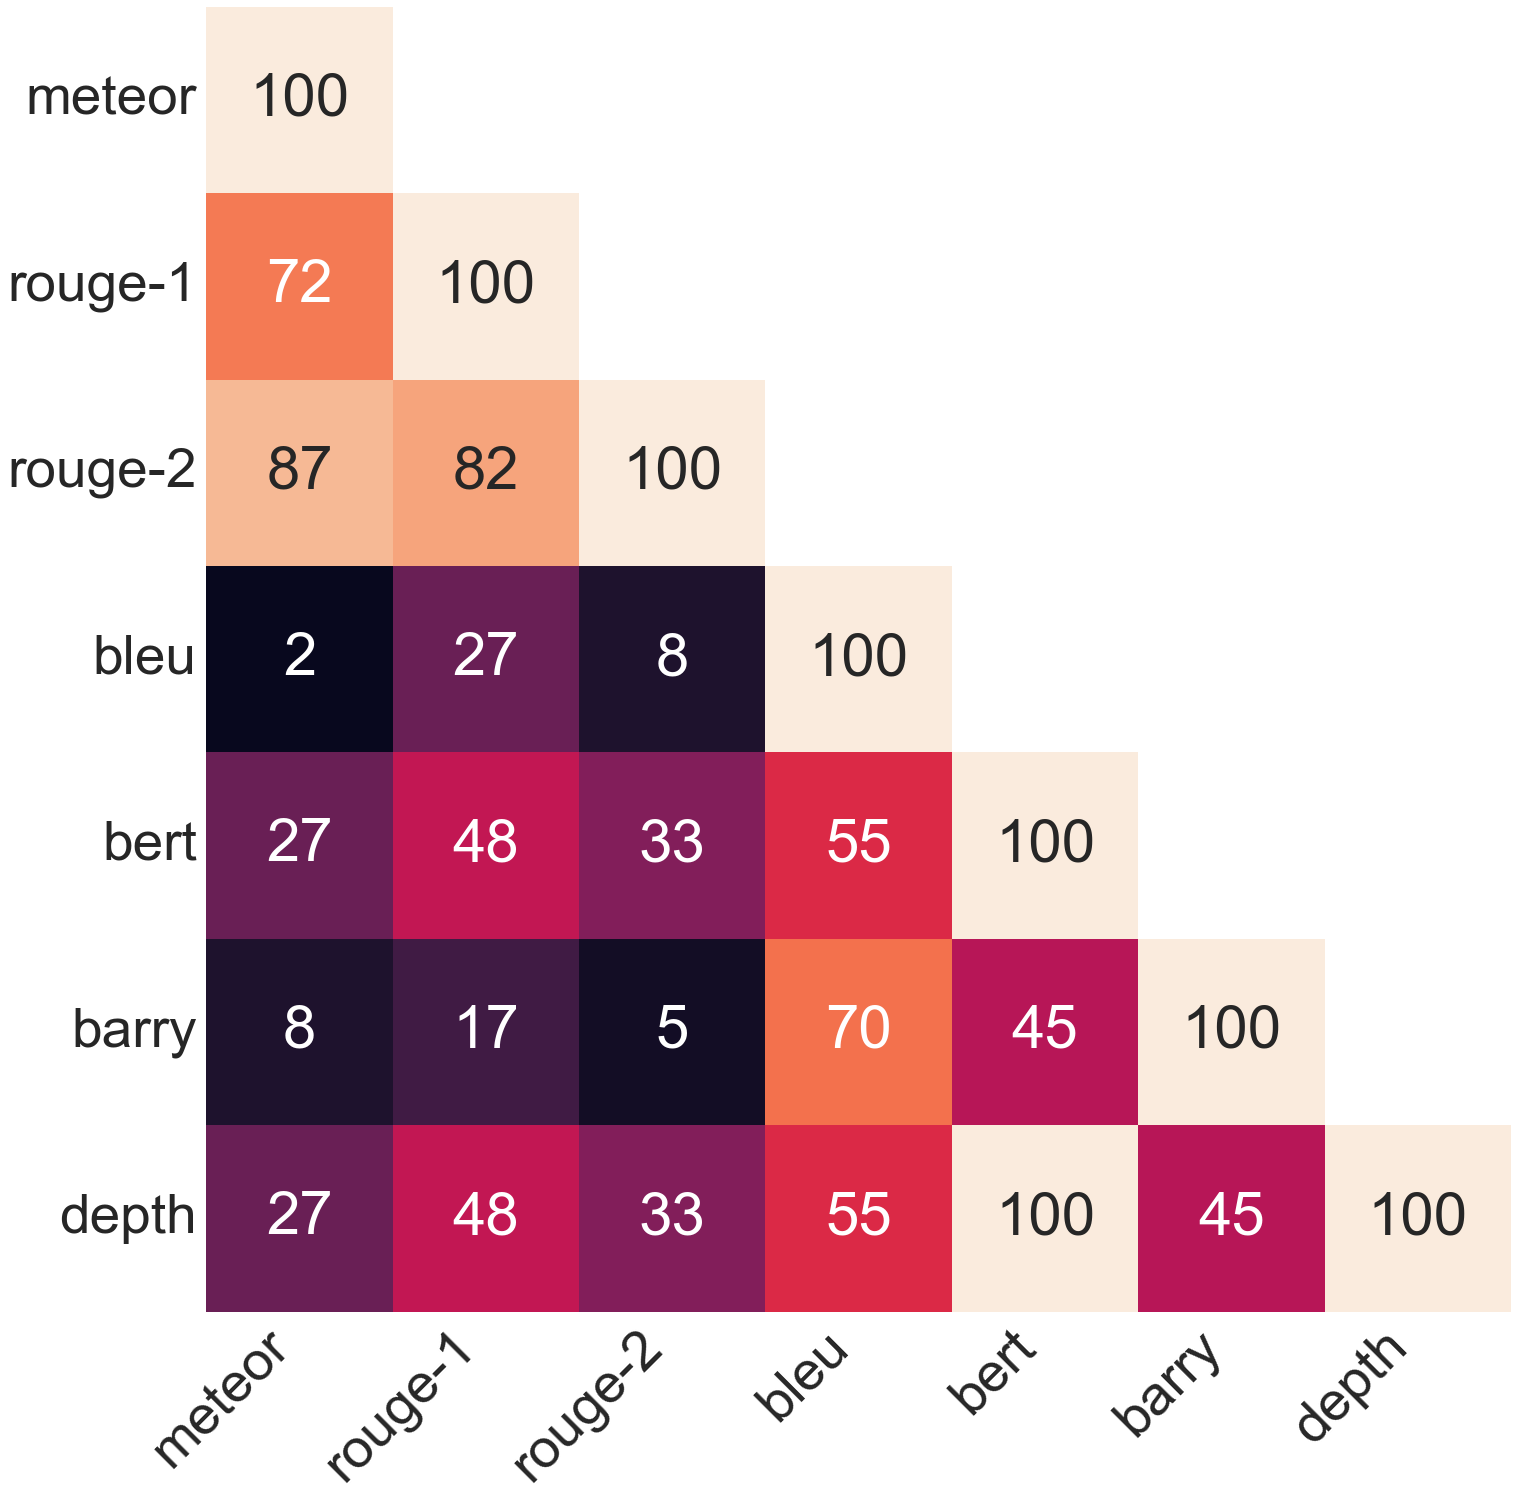

<Figure size 432x288 with 0 Axes>

In [184]:
### System-level ###
print_correlation_heatmap("system", "kendall", df= METRICS_DF, 
                              metrics_subset1= M2, 
                              metrics_subset2= None,
                              xticklabels=M2,
                              yticklabels=M2,
                              use_mask=True, font_scale=5, figsize=(25,24),
                              savepath=None)

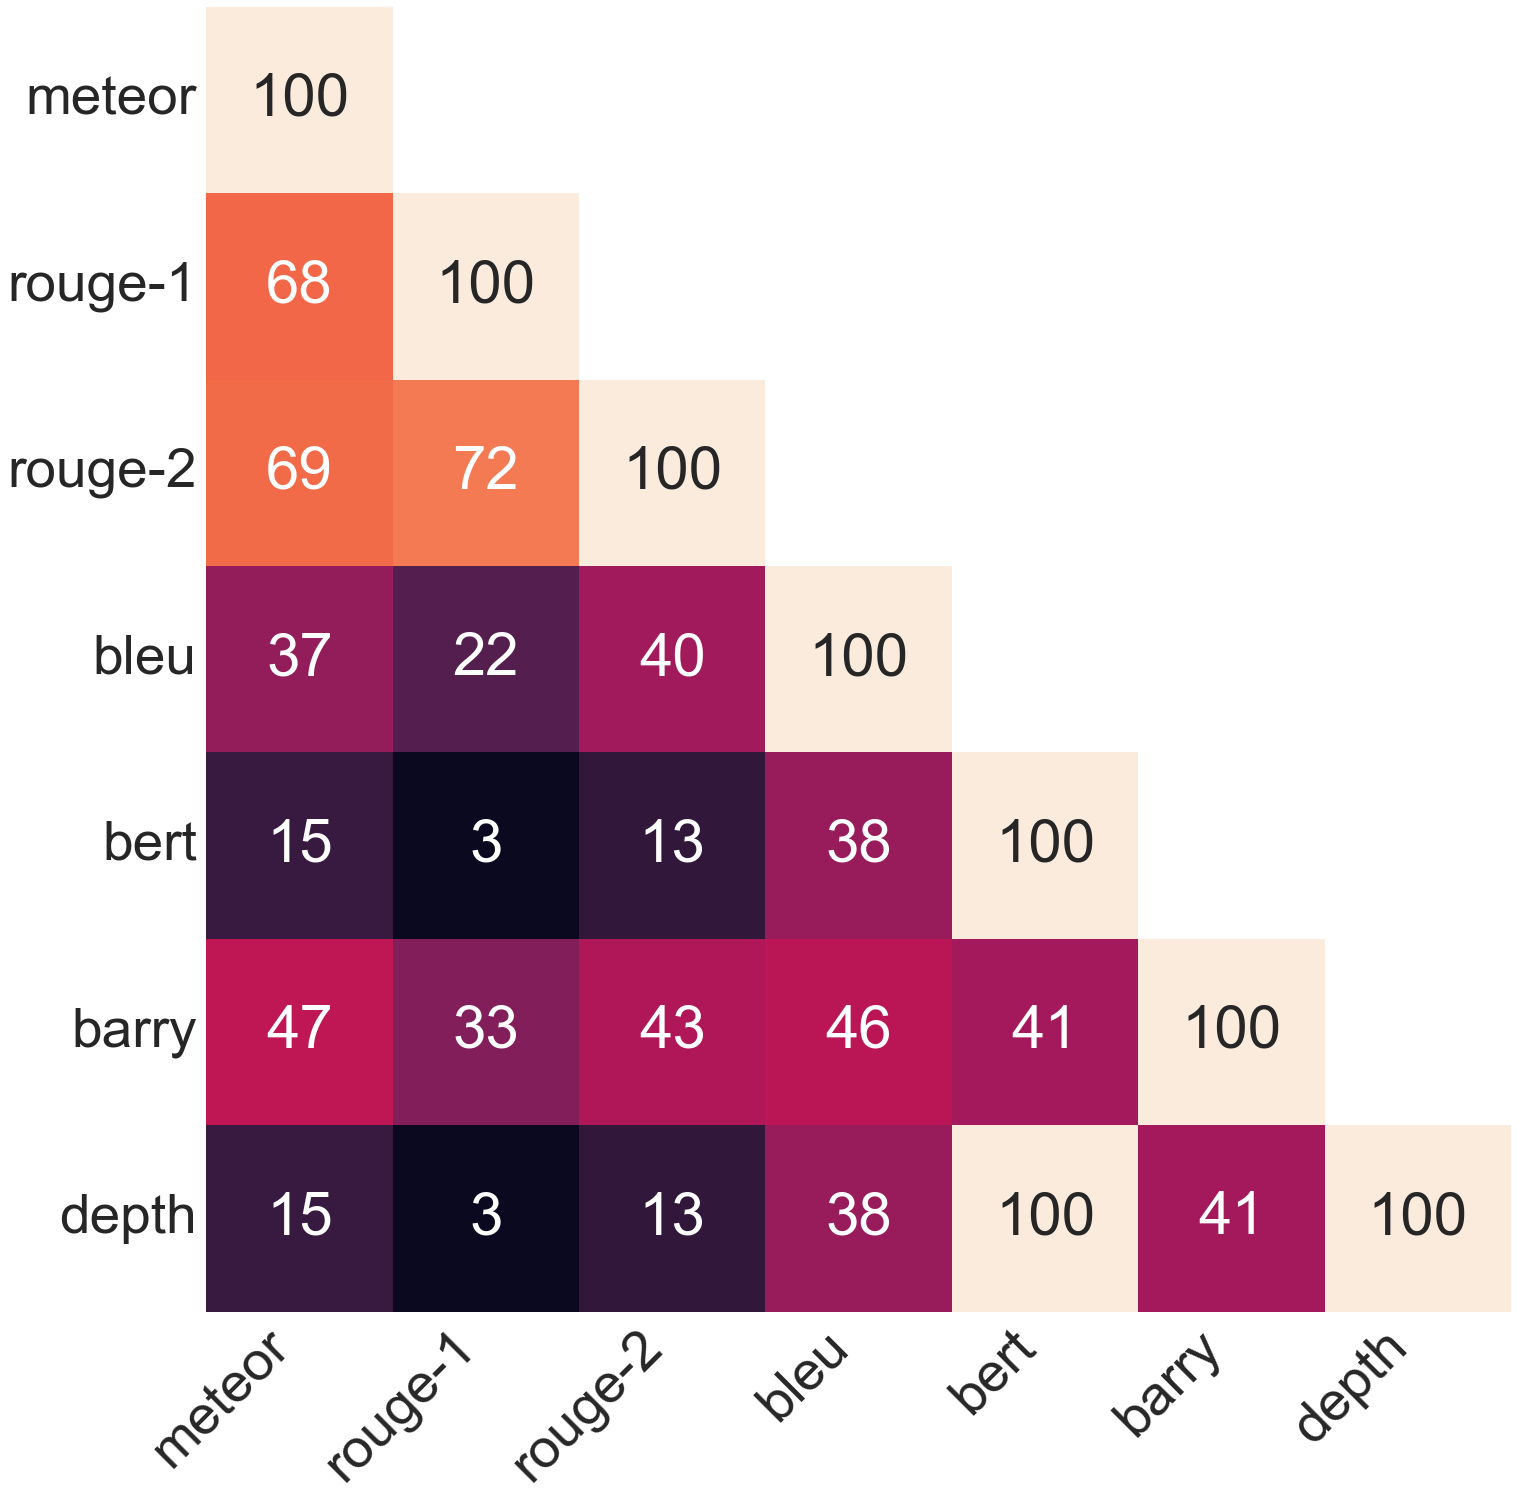

<Figure size 432x288 with 0 Axes>

In [185]:
### Sum-Up level ###
print_correlation_heatmap("sumup", "kendall", df= METRICS_DF, 
                              metrics_subset1= M2, 
                              metrics_subset2= None,
                              xticklabels=M2,
                              yticklabels=M2,
                              use_mask=True, font_scale=5, figsize=(25,24),
                              savepath=None)

### Kemedy consensus for final ranking :

In [253]:
def kemeny_consensus(rankings):
    # We create a matrix to store the pairwise preferences counts
    n_items = len(rankings[0])
    pref_counts = [[0 for j in range(n_items)] for i in range(n_items)]
    for r in rankings:
        for i in range(n_items):
            for j in range(i+1, n_items):
                pref_counts[r[i]][r[j]] += 1

    # We create a matrix to store the pairwise agreement counts
    agree_counts = [[0 for j in range(n_items)] for i in range(n_items)]
    for i in range(n_items):
        for j in range(i+1, n_items):
            for k in range(n_items):
                if pref_counts[i][k] < pref_counts[j][k]:
                    agree_counts[i][j] += 1
                elif pref_counts[i][k] > pref_counts[j][k]:
                    agree_counts[j][i] += 1

    # We find the ordering that maximizes the Kemeny score
    best_order = None
    best_score = -1
    for order in permutations(range(n_items)):
        score = 0
        for i in range(n_items):
            for j in range(i+1, n_items):
                if agree_counts[order[i]][order[j]] > agree_counts[order[j]][order[i]]:
                    score += 1
        if score > best_score:
            best_score = score
            best_order = order

    return [i for i in best_order]

In [254]:
References={"meteor":0,"rouge-1":1,"rouge-2":2,"bleu":3,"bert":4,"barry":5,"depth":6}
C= [[0, 2, 4, 6, 1, 3, 5], [0, 2, 4, 6, 1, 3, 5], [4, 6, 3, 2, 0, 1, 5]] # Rankings for Coherence
R= [[0, 2, 1, 3, 5, 4, 6], [0, 2, 1, 3, 5, 4, 6], [2, 0, 1, 3, 5, 4, 6]] # Rankings for Relevance

In [257]:
### Final ranking for Coherence ###
kemeny_consensus(C)

[4, 0, 2, 1, 3, 6, 5]

In [258]:
### Final rankings for Relevance ###
kemeny_consensus(R) # Final rankings for Relevance

[0, 2, 1, 3, 5, 4, 6]